In [47]:
import pandas as pd
import numpy as np
import intake


In [48]:
cat = intake.open_catalog('../catalogs/catalog.yml')
df = cat.measures.read()

In [49]:
df.head()

,cdtfa_id,ballot_designation,county_fips,county_name,county_and_measure,lost_rate,total_pct_transit,pct_transit_ops,pct_transit_capital,pct_local_return,pct_hwy,pct_streets,pct_discretionary,pct_sum,year,amendable,change_feq,two_thirds_req
0,79,Measure B,6001,Alameda,Alameda Measure B,0.005,0.590,NaN,NaN,0.240,0.170,NaN,NaN,1.000,2000,True,NaN,True
1,377,Measure BB,6001,Alameda,Alameda Measure BB,0.005,0.480,0.2381,0.140,NaN,0.300,0.090,NaN,0.870,2014,True,NaN,True
2,24,Measure J,6013,Contra Costa,Contra Costa Measure J,0.005,0.327,0.1880,0.139,NaN,0.255,0.264,0.13,0.976,2004,True,NaN,True
3,12,Measure C Extension,6019,Fresno,Fresno Measure C Extension,0.005,0.320,NaN,0.060,0.346,0.294,NaN,NaN,0.960,2007,True,NaN,NaN
4,29,Measure D,6025,Imperial,Imperial Measure D,0.005,0.020,NaN,NaN,NaN,0.050,0.930,NaN,1.000,2008,True,NaN,True


In [50]:
df['pct_transit_plus_lr'] = df['total_pct_transit'] + df['pct_local_return']

In [51]:
df.head()

,cdtfa_id,ballot_designation,county_fips,county_name,county_and_measure,lost_rate,total_pct_transit,pct_transit_ops,pct_transit_capital,pct_local_return,pct_hwy,pct_streets,pct_discretionary,pct_sum,year,amendable,change_feq,two_thirds_req,pct_transit_plus_lr
0,79,Measure B,6001,Alameda,Alameda Measure B,0.005,0.590,NaN,NaN,0.240,0.170,NaN,NaN,1.000,2000,True,NaN,True,0.830
1,377,Measure BB,6001,Alameda,Alameda Measure BB,0.005,0.480,0.2381,0.140,NaN,0.300,0.090,NaN,0.870,2014,True,NaN,True,NaN
2,24,Measure J,6013,Contra Costa,Contra Costa Measure J,0.005,0.327,0.1880,0.139,NaN,0.255,0.264,0.13,0.976,2004,True,NaN,True,NaN
3,12,Measure C Extension,6019,Fresno,Fresno Measure C Extension,0.005,0.320,NaN,0.060,0.346,0.294,NaN,NaN,0.960,2007,True,NaN,NaN,0.666
4,29,Measure D,6025,Imperial,Imperial Measure D,0.005,0.020,NaN,NaN,NaN,0.050,0.930,NaN,1.000,2008,True,NaN,True,NaN


In [52]:
df['pct_local_return'] = df['pct_local_return'].fillna(0)

In [53]:
df['pct_transit_plus_lr'] = df['total_pct_transit'] + df['pct_local_return']

In [54]:
df.head()

,cdtfa_id,ballot_designation,county_fips,county_name,county_and_measure,lost_rate,total_pct_transit,pct_transit_ops,pct_transit_capital,pct_local_return,pct_hwy,pct_streets,pct_discretionary,pct_sum,year,amendable,change_feq,two_thirds_req,pct_transit_plus_lr
0,79,Measure B,6001,Alameda,Alameda Measure B,0.005,0.590,NaN,NaN,0.240,0.170,NaN,NaN,1.000,2000,True,NaN,True,0.830
1,377,Measure BB,6001,Alameda,Alameda Measure BB,0.005,0.480,0.2381,0.140,0.000,0.300,0.090,NaN,0.870,2014,True,NaN,True,0.480
2,24,Measure J,6013,Contra Costa,Contra Costa Measure J,0.005,0.327,0.1880,0.139,0.000,0.255,0.264,0.13,0.976,2004,True,NaN,True,0.327
3,12,Measure C Extension,6019,Fresno,Fresno Measure C Extension,0.005,0.320,NaN,0.060,0.346,0.294,NaN,NaN,0.960,2007,True,NaN,NaN,0.666
4,29,Measure D,6025,Imperial,Imperial Measure D,0.005,0.020,NaN,NaN,0.000,0.050,0.930,NaN,1.000,2008,True,NaN,True,0.020


In [55]:
import plotly.express as px

In [56]:
# px.bar(df,
#        x='pct_transit_plus_lr',
#        color='pct_transit_plus_lr',
#        title='Transit Funding Avaliable using Local Return')

In [57]:
# px.bar(df,
#        x='county_name',
#        y='pct_transit_plus_lr',
#        title='Transit Funding Avaliable using Local Return'
#       )

In [58]:
# px.bar(df,
#        x='county_name',
#        y='total_pct_transit',
#        title='Transit Funding Avaliable'
#       )

In [59]:
# px.bar(df,
#        x='county_name',
#        y='pct_local_return',
#        title='Local Return Avaliable'
#       )

In [60]:
lr_transit = df[['ballot_designation','county_name', 'total_pct_transit','pct_local_return']].copy()

In [61]:
# px.bar(lr_transit,
#       x='ballot_designation',
#       y=['total_pct_transit','pct_local_return'],
#       title='Transit Funding Avaliable using Local Return')


In [62]:
lr_transit.rename(columns={'total_pct_transit': 'Percent Transit', 'pct_local_return': 'Percent Local Return'}, inplace=True)

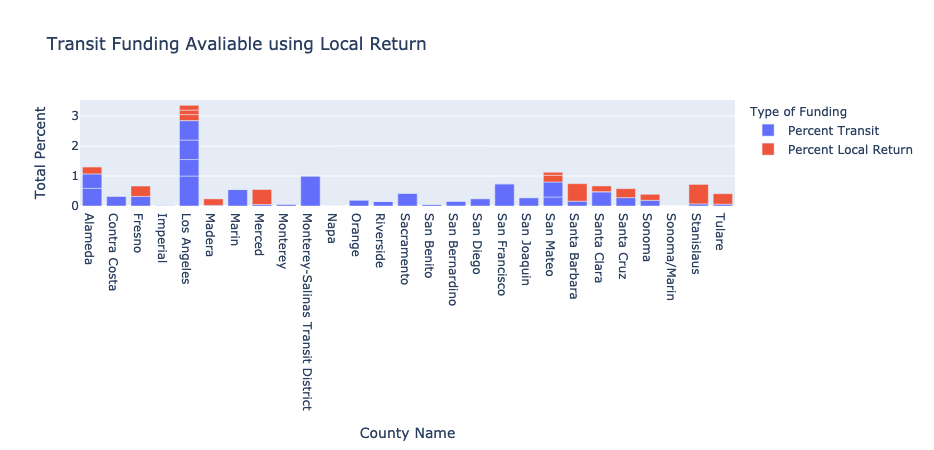

In [63]:
px.bar(lr_transit,
      x='county_name',
      y=['Percent Transit','Percent Local Return'],
       labels={"county_name": "County Name",
                     "value": "Total Percent",
               "variable":"Type of Funding"
                 },
      title='Transit Funding Avaliable using Local Return')


In [64]:
lr_transit.head()

,ballot_designation,county_name,Percent Transit,Percent Local Return
0,Measure B,Alameda,0.590,0.240
1,Measure BB,Alameda,0.480,0.000
2,Measure J,Contra Costa,0.327,0.000
3,Measure C Extension,Fresno,0.320,0.346
4,Measure D,Imperial,0.020,0.000


In [65]:
lr_transit["County_LOST"] = df["county_name"]+ ' ' + df["ballot_designation"]

In [66]:
lr_transit.head()

,ballot_designation,county_name,Percent Transit,Percent Local Return,County_LOST
0,Measure B,Alameda,0.590,0.240,Alameda Measure B
1,Measure BB,Alameda,0.480,0.000,Alameda Measure BB
2,Measure J,Contra Costa,0.327,0.000,Contra Costa Measure J
3,Measure C Extension,Fresno,0.320,0.346,Fresno Measure C Extension
4,Measure D,Imperial,0.020,0.000,Imperial Measure D


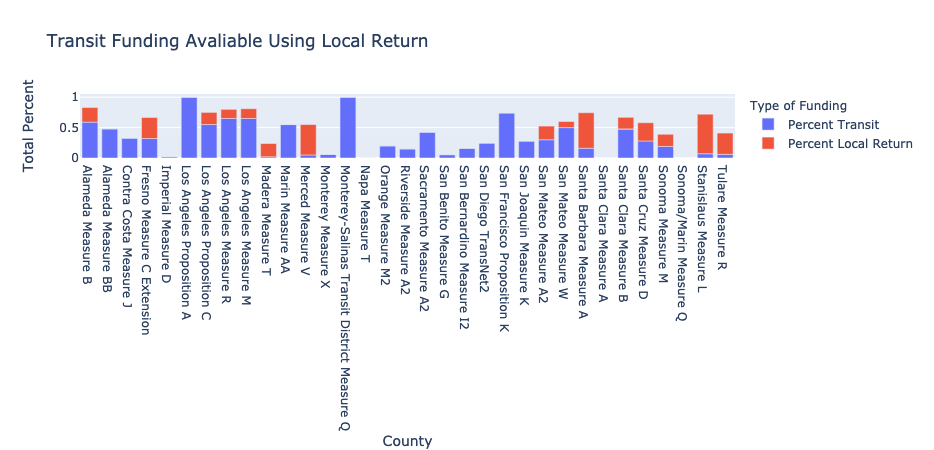

In [67]:
#this is the final one
px.bar(lr_transit,
      x='County_LOST',
      y=['Percent Transit','Percent Local Return'],
       labels={"County_LOST": "County",
                     "value": "Total Percent",
               "variable":"Type of Funding"},
      title='Transit Funding Avaliable Using Local Return')


In [68]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ucla')

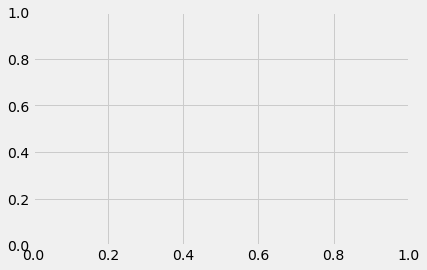

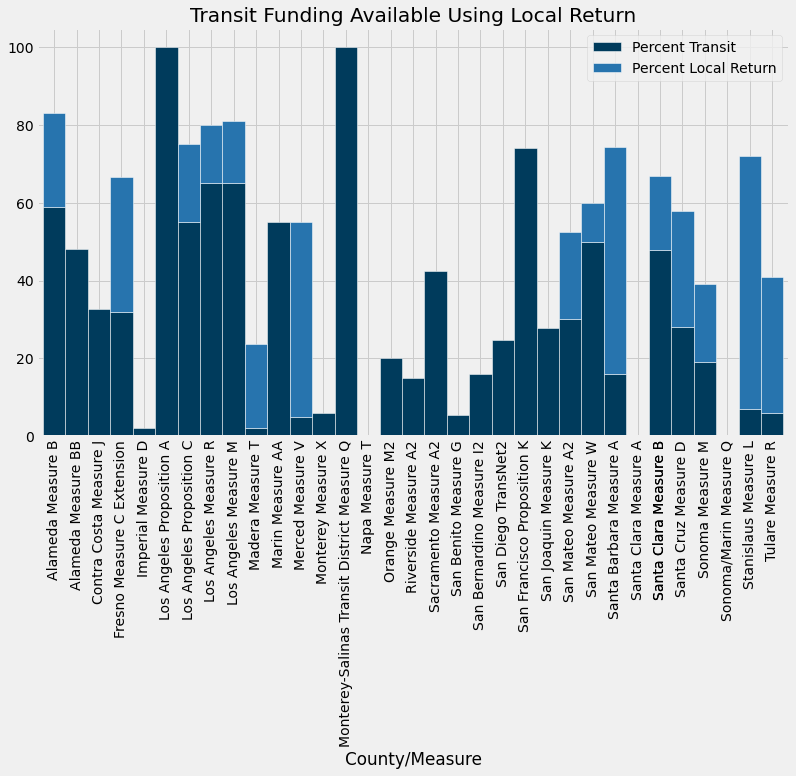

In [84]:
fig, ax = plt.subplots()
ax = (lr_transit.set_index('County_LOST')[['Percent Transit', 'Percent Local Return']].multiply(100).
 plot(kind='bar', width=1, figsize=(12,7), stacked=True, edgecolor='white'));
ax.set_xlabel('County/Measure')
ax.set_title('Transit Funding Available Using Local Return')
plt.savefig('./lr_chart.png', bbox_inches = "tight", facecolor='white')

In [ ]:
(all_funding_19.sort_values('LOST ratio of total', ascending=False)
 [['Fares ratio of total', 'LOST ratio of total', 'LOST operations ratio of total']]
 .plot(kind='bar', width=1, figsize=(12,8)) );

In [22]:
df['pct_discretionary'] = df['pct_discretionary'].fillna(0)

In [23]:
disc_transit = df[['ballot_designation','county_name', 'total_pct_transit','pct_discretionary']].copy()

In [24]:
disc_transit.rename(columns={'total_pct_transit': 'Percent Transit', 'pct_discretionary': 'Percent Discretionary'}, inplace=True)

In [25]:
disc_transit["County_LOST"] = df["county_name"]+ ' ' + df["ballot_designation"]

In [26]:
disc_transit.head()

,ballot_designation,county_name,Percent Transit,Percent Discretionary,County_LOST
0,Measure B,Alameda,0.590,0.00,Alameda Measure B
1,Measure BB,Alameda,0.480,0.00,Alameda Measure BB
2,Measure J,Contra Costa,0.327,0.13,Contra Costa Measure J
3,Measure C Extension,Fresno,0.320,0.00,Fresno Measure C Extension
4,Measure D,Imperial,0.020,0.00,Imperial Measure D


In [27]:
df['pct_transit_plus_discretionary'] = df['total_pct_transit'] + df['pct_discretionary']

In [75]:
# px.bar(df,
#        x='county_name',
#        y='pct_transit_plus_discretionary',
#        title='Transit Funding Avaliable using Discretionary'
#       )

In [29]:
disc_transit = df[['ballot_designation','county_name', 'total_pct_transit','pct_discretionary']].copy()

In [30]:
disc_transit["County_LOST"] = df["county_name"]+ ' ' + df["ballot_designation"]

In [31]:
disc_transit.rename(columns={'total_pct_transit':'Percent Transit', 'pct_discretionary':'Percent Discretionary'}, inplace=True)

In [32]:
disc_transit.head()


,ballot_designation,county_name,Percent Transit,Percent Discretionary,County_LOST
0,Measure B,Alameda,0.590,0.00,Alameda Measure B
1,Measure BB,Alameda,0.480,0.00,Alameda Measure BB
2,Measure J,Contra Costa,0.327,0.13,Contra Costa Measure J
3,Measure C Extension,Fresno,0.320,0.00,Fresno Measure C Extension
4,Measure D,Imperial,0.020,0.00,Imperial Measure D


In [76]:
# px.bar(disc_transit,
#       x='County_LOST',
#       y=["Percent Transit","Percent Discretionary"])

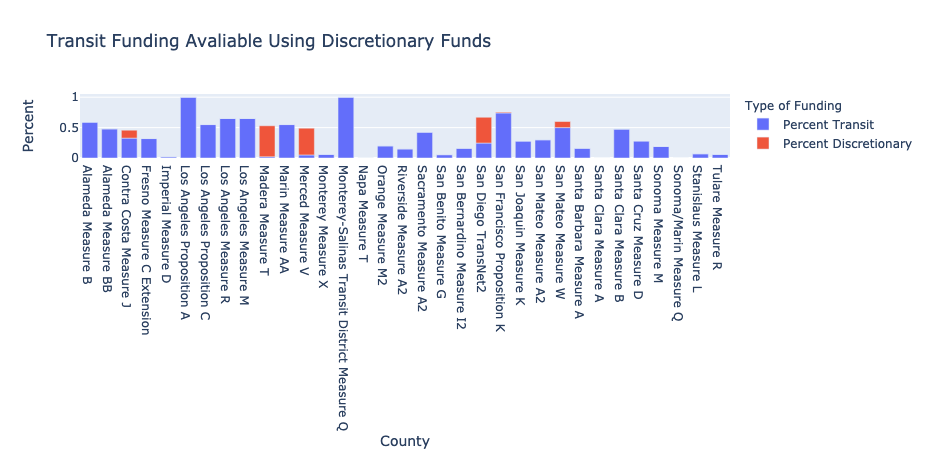

In [77]:
px.bar(disc_transit,
      x='County_LOST',
      y=["Percent Transit","Percent Discretionary"],
       labels={"County_LOST": "County",
               "value":"Percent",
               "variable":"Type of Funding"},
      title='Transit Funding Avaliable Using Discretionary Funds')


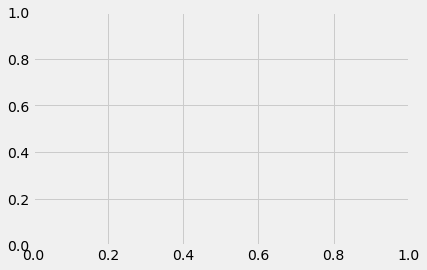

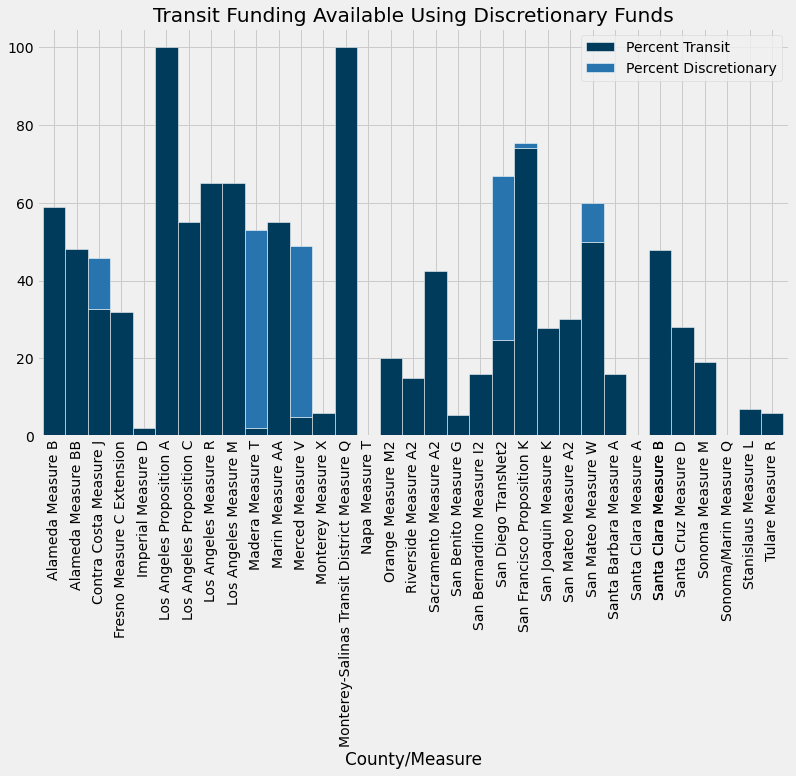

In [83]:
fig, ax = plt.subplots()
ax = (disc_transit.set_index('County_LOST')[['Percent Transit', 'Percent Discretionary']].multiply(100).
 plot(kind='bar', width=1, figsize=(12,7), stacked=True, edgecolor='white'));
ax.set_xlabel('County/Measure')
ax.set_title('Transit Funding Available Using Discretionary Funds')
plt.savefig('./disc_chart.png', bbox_inches = "tight", facecolor='white')

In [35]:
demo = pd.read_csv('capstone_demographics2.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'capstone_demographics2.csv'

In [ ]:
demo.head()

In [ ]:
demo.drop(0)

In [ ]:
import numpy as np

import statsmodels.api as sm

import statsmodels.formula.api as smf

In [ ]:
##Regression 

X = demo["Population"]
y = demo["# Transit Operators"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

In [ ]:
demo['pct_transit_ops'] = demo['pct_transit_ops'].fillna(0)

In [ ]:
X = demo["Population"]
y = demo["pct_transit_ops"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

In [ ]:
demo['total_pct_transit'] = demo['total_pct_transit'].fillna(0)

In [ ]:
X = demo["Population"]
y = demo["total_pct_transit"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()